In [1]:
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Read into Pandas
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop rows containing null values and then drop the IsTrading column 
df_dropna = df_trading.dropna(axis=0).drop(columns=['IsTrading', 'Unnamed: 0'])
df_dropna

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Filter for cryptocurrencies that have been mined.
mined_df = df_dropna[df_dropna['TotalCoinsMined'] > 0]
mined_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Drop coin name column 
final_df = mined_df.drop(columns='CoinName')
final_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
# Create dummy variables
encoded_df = pd.get_dummies(final_df, columns=['Algorithm', 'ProofType'])
encoded_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize your dataset
scaled_df = StandardScaler().fit_transform(encoded_df)
print(scaled_df[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [10]:
# Perform dimensionality reduction with PCA
# Initialize PCA model
pca = PCA(n_components=.9)

# Get two principal components for the iris data.
pcaD = pca.fit_transform(scaled_df)
pcaD

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -3.51720779e-15, -3.12065874e-16, -2.20723452e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.69138615e-15,  8.49854065e-17, -2.69815985e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         1.07948451e-14,  1.83151042e-15,  1.01911372e-13],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.28159104e-14, -2.03709219e-14,  6.78617186e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -6.64421259e-16, -5.28857042e-16, -1.60766873e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.93763644e-16, -1.89250183e-15, -2.16610617e-15]])

In [11]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=pcaD)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.266896e-11,-1.619930e-14,1.855998e-14,-0.007129,-1.319756,-0.051813,...,-2.943328e-17,-1.628190e-15,-4.185189e-16,8.794398e-16,-9.284059e-16,-1.851279e-16,-4.030770e-15,-3.517208e-15,-3.120659e-16,-2.207235e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.256567e-11,-1.605556e-14,1.879267e-14,-0.007739,-1.322514,-0.056674,...,-3.750933e-16,-2.249261e-15,-1.368878e-15,1.726122e-15,-7.743451e-16,-1.363041e-16,-5.475716e-15,-3.691386e-15,8.498541e-17,-2.698160e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.292765e-11,-1.830827e-14,3.638442e-14,-0.054781,-1.542879,-0.943951,...,-2.069765e-14,5.059999e-14,1.297215e-14,-4.743833e-14,-2.156463e-14,3.995776e-15,6.108146e-14,1.079485e-14,1.831510e-15,1.019114e-13
3,-0.145184,-1.320593,0.192813,-0.001229,1.114521e-11,4.391470e-15,-9.032184e-15,-0.002071,0.281463,0.251862,...,-4.594302e-15,7.090820e-15,6.383691e-15,-4.074385e-15,-8.289274e-15,6.411749e-15,3.022296e-15,4.236852e-15,-3.298000e-15,9.484947e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.547472e-11,9.512881e-15,-1.647720e-14,0.027735,0.519099,0.188820,...,8.779275e-15,3.361138e-14,2.896883e-14,-6.970282e-14,-1.745972e-13,1.138857e-13,2.130554e-14,7.910416e-14,-4.658741e-14,2.998087e-14


In [12]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [13]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

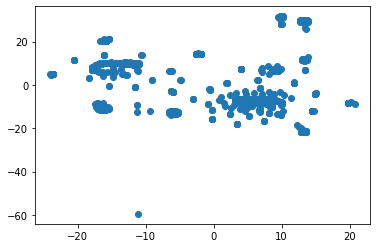

In [15]:
# Visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

In [16]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=5, random_state=5)

In [17]:
# Fitting model
model.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [18]:
# Get predictions
predictions = model.predict(df_pca)
print(predictions)

[3 3 3 4 2 2 0 2 2 2 1 2 4 4 2 3 0 2 3 3 2 2 4 2 2 3 1 0 2 3 2 3 2 0 2 0 2
 4 2 2 2 2 1 2 2 0 2 2 2 3 1 2 0 4 2 2 2 3 2 2 1 2 4 1 3 2 4 2 3 0 3 3 3 2
 2 2 1 0 4 2 4 3 0 4 4 4 0 3 3 2 2 2 2 0 2 4 3 3 2 2 2 1 2 4 0 2 1 2 3 2 1
 2 3 3 2 2 1 2 0 2 3 2 2 2 4 2 0 3 0 2 4 3 0 0 2 2 1 2 3 2 4 3 0 4 3 2 2 4
 0 2 4 4 3 3 1 0 2 2 2 0 1 4 2 1 2 0 0 4 4 3 0 2 1 3 3 3 3 0 1 2 0 3 2 4 4
 0 3 2 3 2 1 4 2 2 3 1 3 0 2 1 3 3 1 3 2 2 1 0 2 0 3 0 1 3 3 0 1 0 4 3 0 3
 3 0 2 3 1 3 3 1 0 2 2 2 3 4 0 3 0 3 2 1 2 2 3 0 2 3 2 2 1 2 0 3 0 2 1 0 3
 1 0 3 3 3 4 0 2 1 4 1 3 3 4 2 1 2 3 2 2 2 2 3 0 3 3 2 3 2 0 0 3 2 3 2 2 3
 1 0 3 4 0 1 0 2 1 2 2 2 2 2 3 3 2 1 1 0 2 0 0 3 0 2 2 3 4 3 3 2 3 1 2 1 3
 4 0 0 2 0 0 1 3 3 2 3 2 2 2 3 1 0 2 3 3 2 0 3 0 0 1 0 2 3 3 1 0 4 3 1 2 2
 2 2 3 2 2 2 2 3 2 2 2 2 0 3 2 0 3 1 1 2 2 2 2 3 3 3 2 1 2 1 1 3 4 0 1 1 2
 1 3 3 2 0 2 1 2 2 2 2 3 1 2 3 2 3 3 2 1 4 1 1 2 0 1 1 1 1 2 1 2 3 2 2 3 2
 1 0 1 1 4 3 1 0 3 1 1 2 2 3 2 4 3 1 2 1 2 2 2 2 2 3 2 1 2 1 3 0 1 3 3 3 0
 4 3 4 0 1 3 2 0 0 3 2 3 

In [19]:
# Add a new class column to df_iris
df_pca["class"] = model.labels_
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-1.266896e-11,-1.619930e-14,1.855998e-14,-0.007129,-1.319756,-0.051813,...,8.794398e-16,-9.284059e-16,-1.851279e-16,-4.030770e-15,-3.517208e-15,-3.120659e-16,-2.207235e-15,-10.920466,9.497510,3
1,-0.318434,1.032331,-0.591126,0.001386,-1.256567e-11,-1.605556e-14,1.879267e-14,-0.007739,-1.322514,-0.056674,...,1.726122e-15,-7.743451e-16,-1.363041e-16,-5.475716e-15,-3.691386e-15,8.498541e-17,-2.698160e-15,-16.866236,6.033652,3
2,2.305468,1.656383,-0.683617,0.004731,-4.292765e-11,-1.830827e-14,3.638442e-14,-0.054781,-1.542879,-0.943951,...,-4.743833e-14,-2.156463e-14,3.995776e-15,6.108146e-14,1.079485e-14,1.831510e-15,1.019114e-13,-16.700623,20.072203,3
3,-0.145184,-1.320593,0.192813,-0.001229,1.114521e-11,4.391470e-15,-9.032184e-15,-0.002071,0.281463,0.251862,...,-4.074385e-15,-8.289274e-15,6.411749e-15,3.022296e-15,4.236852e-15,-3.298000e-15,9.484947e-15,12.642527,29.221754,4
4,-0.151768,-2.036192,0.396182,-0.001705,1.547472e-11,9.512881e-15,-1.647720e-14,0.027735,0.519099,0.188820,...,-6.970282e-14,-1.745972e-13,1.138857e-13,2.130554e-14,7.910416e-14,-4.658741e-14,2.998087e-14,14.443108,-12.020733,2


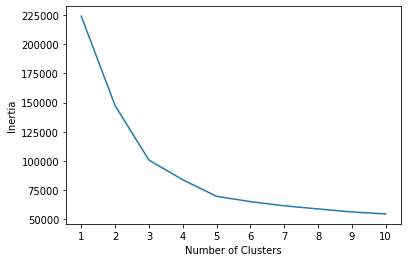

In [21]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()